## Experiments - plots

*Elżbieta Jowik* <br>
*Agata Makarewicz*

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings(action='ignore')

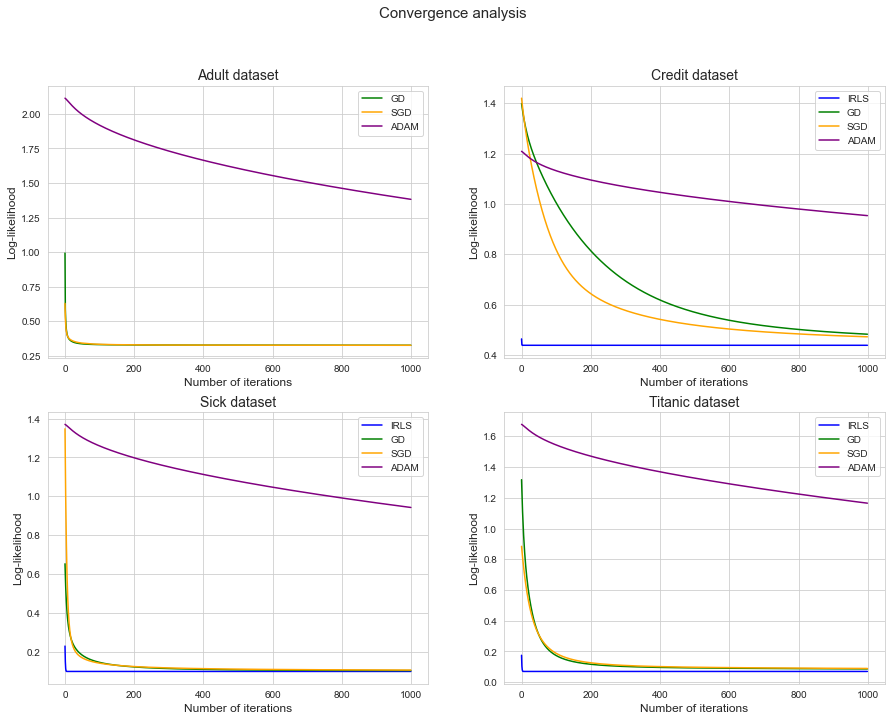

In [2]:
# 1. Convergence analysis (learning rate = 1e-4)
convergence = pd.read_csv('./../results/convergence_analysis_results.csv', index_col='n_iter')
#convergence = convergence[:200]
fig, axes = plt.subplots(2,2,figsize=(15,11))
datasets = ['adult', 'credit', 'sick', 'titanic']
algorithms = ['IRLS', 'GD', 'SGD', 'ADAM']
colors = ['blue', 'green', 'orange', 'purple']
for i in range(4):
    dataset_name=datasets[i]
    if i==0:
        convergence_dataset = convergence.iloc[:, 0:3].reset_index()
    else:
        convergence_dataset = convergence.iloc[:, (i*4 - 1):(i*4 + 3)].reset_index()
    for j, col in enumerate(convergence_dataset.columns[1:]):
        if dataset_name=='adult':
            sns.lineplot(data=convergence_dataset, x='n_iter' , y=col, ax=axes[i//2,i%2], label=algorithms[1:][j], color=colors[1:][j])
        else:
            sns.lineplot(data=convergence_dataset, x='n_iter' , y=col, ax=axes[i//2,i%2], label=algorithms[j], color=colors[j])
    axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
    axes[i//2,i%2].set_xlabel('Number of iterations', size=12)
    axes[i//2,i%2].set_ylabel('Log-likelihood', size=12)
fig.suptitle("Convergence analysis", size=15)
plt.show()

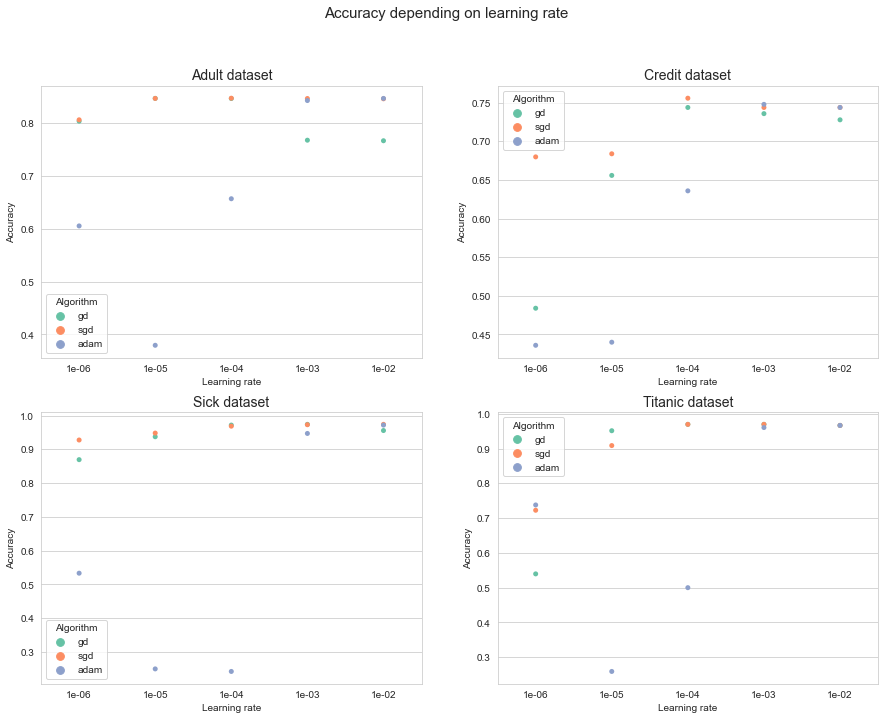

In [3]:
# 2. Learning rate evaluation - accuracy
fig, axes = plt.subplots(2,2,figsize=(15,11))
datasets = ['adult', 'credit', 'sick', 'titanic']
for i in range(4):
    dataset_name=datasets[i]
    lr_data = pd.read_csv(f'./../results/learning_rate_acc_{dataset_name}.csv')
    for j in range(lr_data.shape[0]):
        lr_data.loc[j, 'Learning rate'] = '{:.0e}'.format(lr_data.loc[j, 'Learning rate'])
    sns.stripplot(x="Learning rate", y="Accuracy", hue="Algorithm",
                   data=lr_data, palette="Set2", dodge=False, jitter=0.0, ax=axes[i//2,i%2])    
    axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
    # axes[i//2,i%2].set_xlabel('b2', size=12)
    # axes[i//2,i%2].set_ylabel('b1', size=12)
fig.suptitle("Accuracy depending on learning rate", size=15)
plt.show()

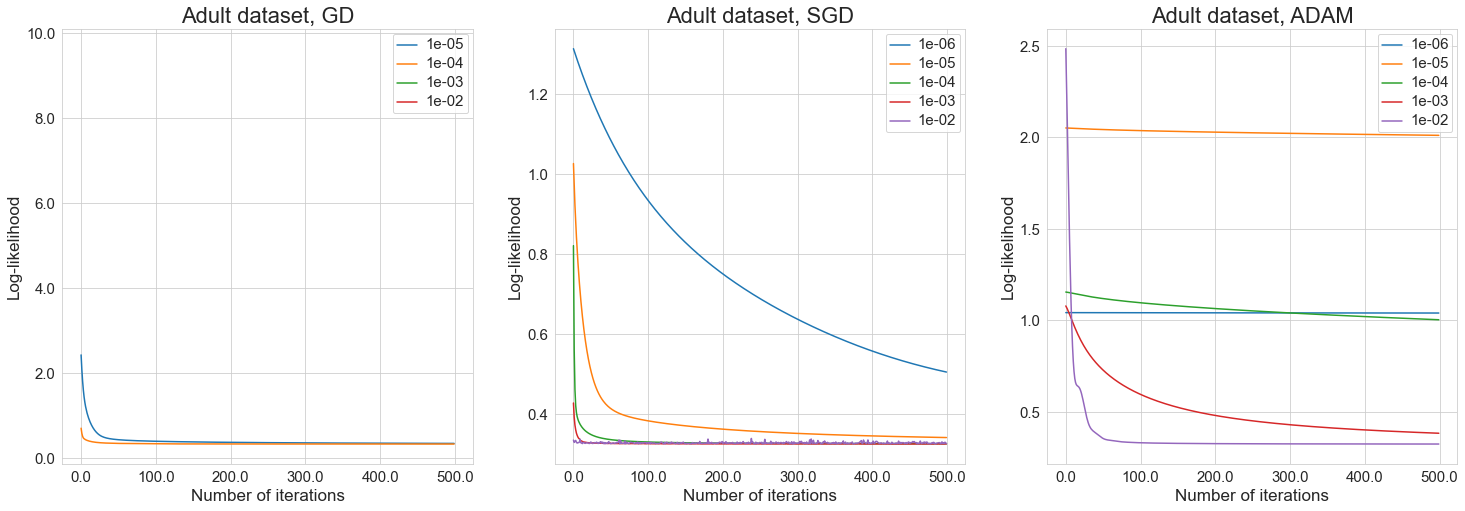

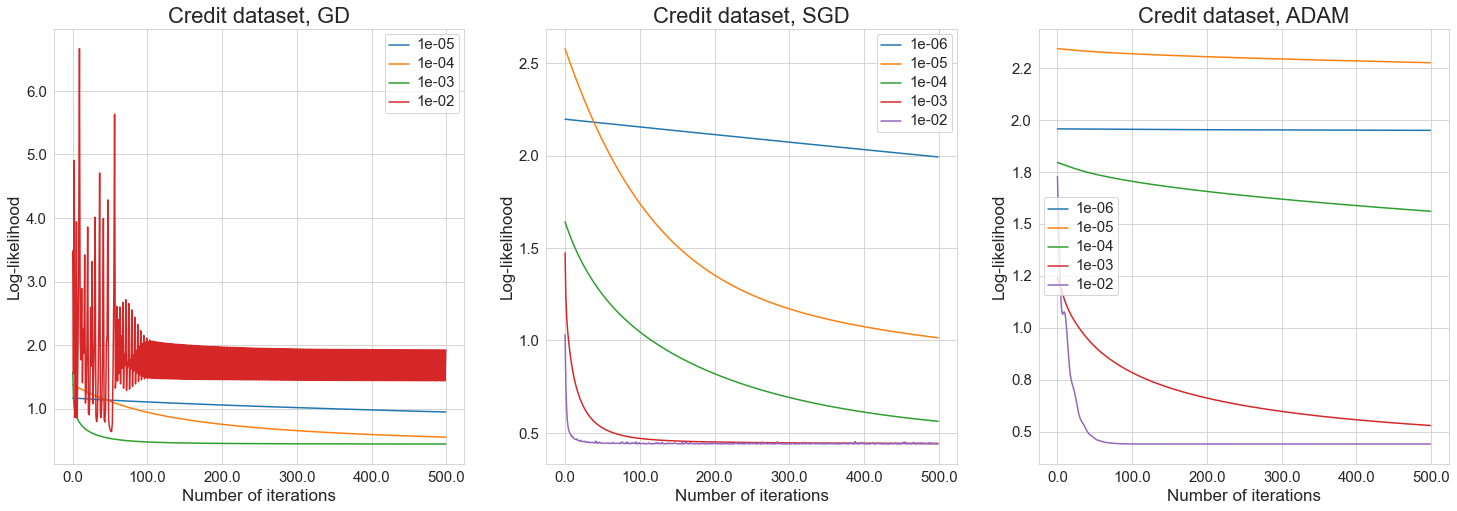

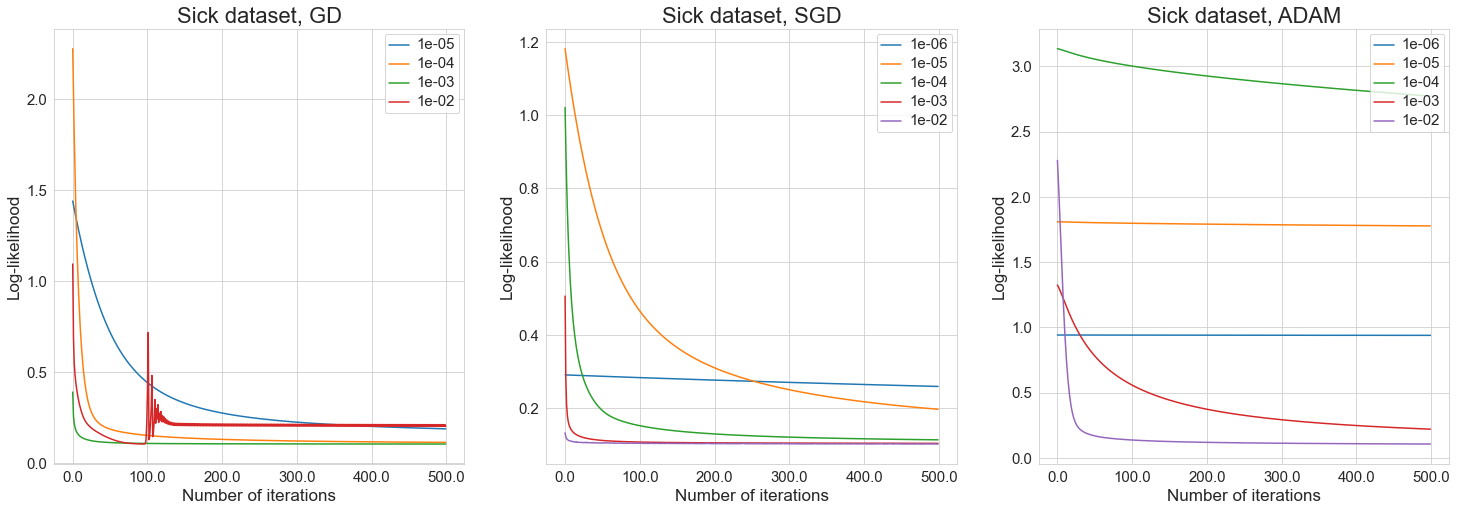

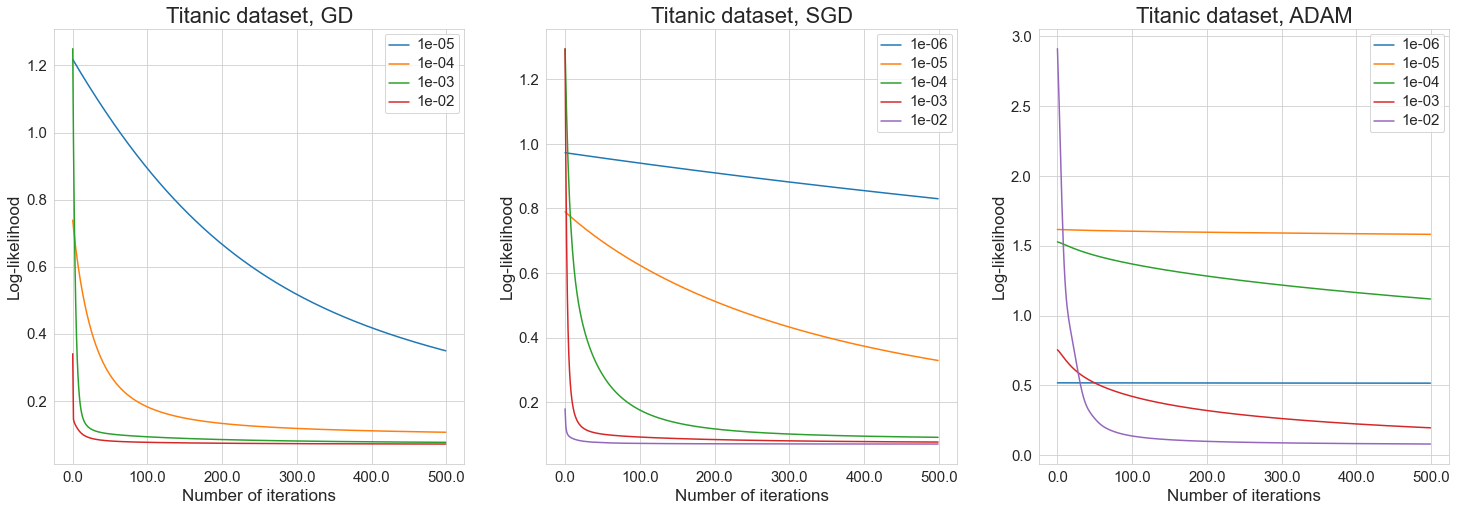

In [4]:
# 3. Learning rate evaluation - convergence
datasets = ['adult', 'credit', 'sick', 'titanic']
algorithms = ['gd', 'sgd', 'adam']
for i in range(4):
    fig, axes = plt.subplots(1,3,figsize=(25,8))
    dataset_name=datasets[i]
    lr_data = pd.read_csv(f'./../results/learning_rate_cost_{dataset_name}.csv', index_col='n_iter')
    lr_data = lr_data[:500]
    for j, alg in enumerate(algorithms):
        columns = [i for i in lr_data.columns[1:] if i.startswith(alg)]
        for k, col in enumerate(columns):
            sns.lineplot(data=lr_data, x='n_iter' , y=col, ax=axes[j], label=col.split("_")[1])
        axes[j].set_title(dataset_name.capitalize()+' dataset, '+alg.upper(), size=22)
        axes[j].set_xlabel('Number of iterations', size=17)
        axes[j].set_ylabel('Log-likelihood', size=17)
        axes[j].set_yticklabels(np.round(axes[j].get_yticks(),1), size = 15)
        axes[j].set_xticklabels(np.round(axes[j].get_xticks(),0), size = 15)
        plt.setp(axes[j].get_legend().get_texts(), fontsize='15')
    plt.show()

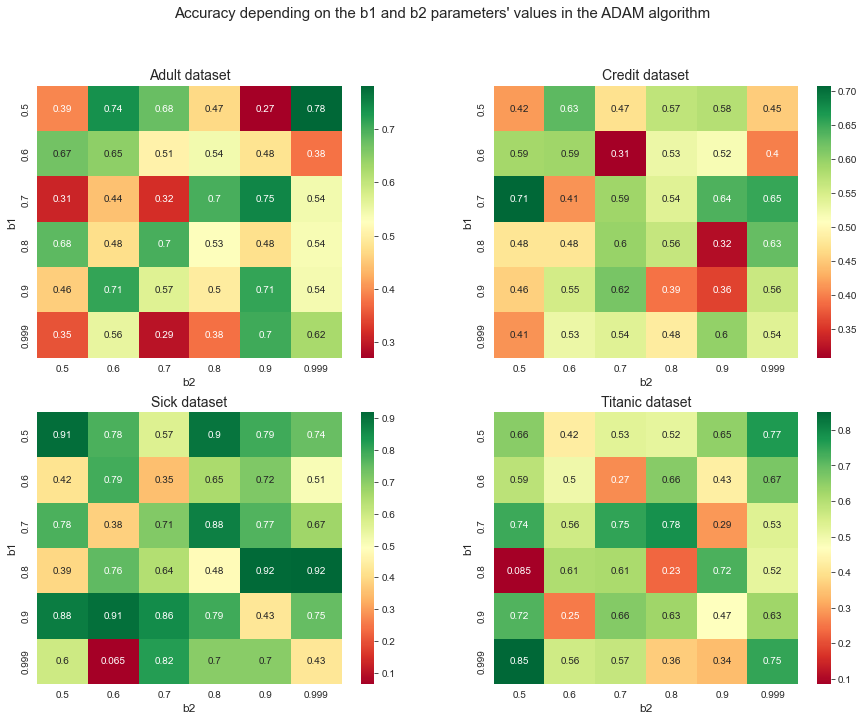

In [5]:
# 4. ADAM parameters evaluation - b1/b2
fig, axes = plt.subplots(2,2,figsize=(15,11))
datasets = ['adult', 'credit', 'sick', 'titanic']
for i in range(4):
    dataset_name=datasets[i]
    adam = pd.read_csv(f'./../results/adam_b1_b2_{dataset_name}.csv', index_col='b1')
    sns.heatmap(adam, annot=True, cmap="RdYlGn", ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(dataset_name.capitalize()+' dataset', size=14)
    axes[i//2,i%2].set_xlabel('b2', size=12)
    axes[i//2,i%2].set_ylabel('b1', size=12)
fig.suptitle("Accuracy depending on the b1 and b2 parameters' values in the ADAM algorithm", size=15)
plt.show()